## Model B

The diffusive dynamics of a conserved scalar order parameter $\phi$ is described by the following equation

$$
\dot{\phi}	+\boldsymbol{\nabla}\cdot\mathbf{J}=0.
$$
Here $\mathbf J$ is 
$$
\mathbf{J}	=-M\boldsymbol{\nabla}\mu+\sqrt{2DM}\boldsymbol{\Lambda},
\\
\mu=\frac{\delta\mathcal{F}}{\delta\phi}.
$$

while the free energy $\mathcal{F}$ is given as

$$
\mathcal{F}=\int\left(\frac{a}{2}\phi^{2}+\frac{b}{4}\phi^{4}+\frac{\kappa}{2}(\boldsymbol{\nabla}\phi)^{2}\right)d\boldsymbol{r}.
$$

Here $b>0$ and $\kappa >0$ for stability. The system will phase separate if $a<0$. This becomes clear from looking at the plot of the free energy, which we now plot. This model has been called the **model B** in Hohenberg and Halpering classification of critical phenomena (Rev. Mod. Phys. 49, 435, 1977). 

In [1]:
%matplotlib inline
import pygl, numpy as np
import scipy as sp
import matplotlib.pyplot as plt

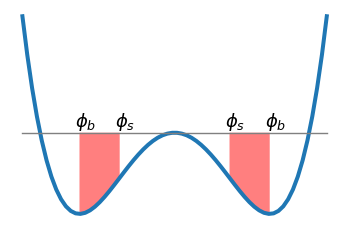

In [2]:
def f(a, b, phi):
    return 0.5*a*phi**2 + 0.25*b*phi**4

phi = np.linspace(-1.6, 1.6, 64)
a, b = -0.25, 0.25

phi_s = np.sqrt(-a/(3*b))
phi_b = np.sqrt(-a/(b))

plt.plot(phi, f(a, b, phi), lw=4); plt.plot(phi, 0*phi, 'grey', lw=1.4);  plt.axis('off');

plt.annotate('$\phi_s$', (phi_s-0.05, 0.005), fontsize=18); 
plt.annotate('$\phi_s$', (-phi_s-0.05, .005), fontsize=18)
plt.annotate('$\phi_b$', (phi_b-0.05, 0.005), fontsize=18); 
plt.annotate('$\phi_b$', (-phi_b-0.05, .005), fontsize=18)

x = np.linspace(-phi_b, -phi_s, 32);  plt.fill_between(x, f(a, b, x), facecolor='red', alpha=0.5)
x = np.linspace(phi_s, phi_b, 32);    plt.fill_between(x, f(a, b, x), facecolor='red', alpha=0.5);

In the shaded region, the free energy is metstable and droplets forms if there is noise in the system. We first study the unstable region $\phi_s < \phi_0 <\phi_s$. In this region, phase separation happens even in absence of noise. 

In [3]:
class modelB():
    '''
    Class to solve a model B
    '''
    def __init__(self, a, b, k, Laplacian):
        self.a = a
        self.b = b
        self.k =  k
        
        self.Laplacian = Laplacian

    
    
    def rhs(self, u):
        return self.Laplacian*(self.a*u + self.b*u*u*u - self.k*self.Laplacian*u)

       
    def integrate(self, u, T, dt):
        '''  solves the equation and plots it at differnt instants '''
        f = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k');    
        N = int (np.size(u)**0.5)
        
        # now evolve the system in time using Euler
        for i in range(int(T)):          
            u = u + dt*self.rhs(u)
            
            if (i==0):               self.configPlot(u, f, 1, i);
            elif (i==int(T/4)):      self.configPlot(u, f, 2, i);
            elif (i==int(T/2)):      self.configPlot(u, f, 3, i);
            elif (i==T-1):           self.configPlot(u, f, 4, i);
        plt.show() 
    
    
    def configPlot(self, u, f, n_, i):
        U= u.reshape((N,N)); sp =  f.add_subplot(1, 4, n_ )  
       
        plt.pcolormesh(U, cmap=plt.cm.RdBu_r); plt.colorbar(orientation='horizontal');
        
        plt.axis('off'); plt.title('T = %1.2E'%(i))
    

In [4]:
# construct the laplacian using PyGL
N, h, st = 32, 1, 5

fd  = pygl.dms.FD(N, st, h)
D22 = fd.diffmat(2); I=sp.sparse.identity(N)

Laplacian = sp.sparse.kron(D22, I) + sp.sparse.kron(I, D22)
Laplacian =  Laplacian.tocsr()

In [5]:
a, b, k   = -.25, .25, 1
rm = modelB(a, b, k, Laplacian)   # instantiate the class

### Simulate the conserved dynamics for a given initial density $\phi_0$

The domain remain bicontinuous for $\phi_0 <0.4$, while droplets are formed otherwise.

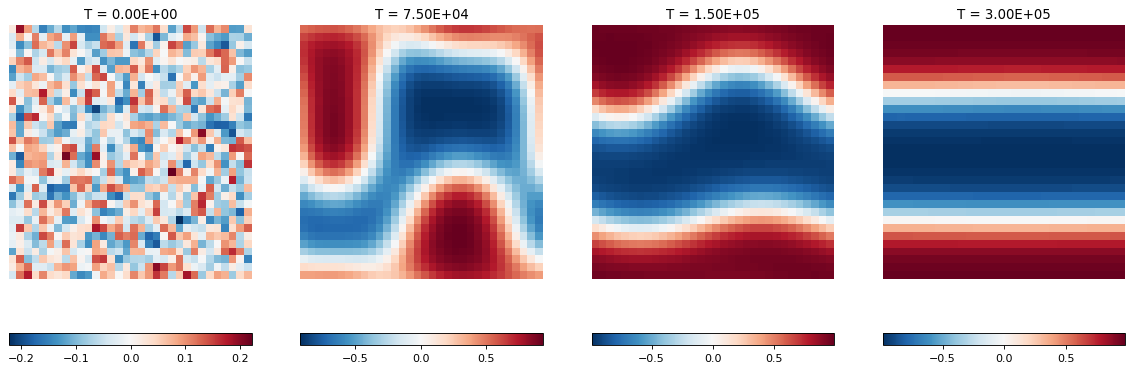

In [9]:
u0 = 0.0
u  = u0 + 0.2*(1-2*np.random.random(N*N))


# Integrate and plot the data
T, dt  = 3e5, 0.01
rm.integrate(u, T, dt)

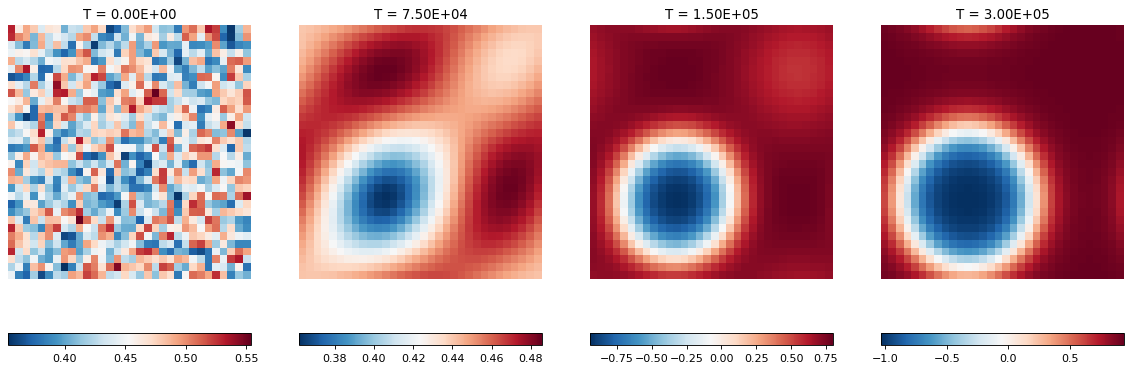

In [7]:
# Simulate the conserved dynamics for a given initial density \phi
u0 = 0.45
u  = u0 + 0.1*(1-2*np.random.random(N*N))


# Integrate and plot the data
T, dt  = 3e5, 0.01
rm.integrate(u, T, dt)